# Exercise 3 - Discrete random variable

**R code presented in this excercise is not required on homeworks or exams, its only to show what is possible in R an to complement the excercise with nice graphs.**
 
## Martina Litschmannová, Adéla Vrtková, Michal Béreš
 


# Examples
 
## Example 1.
 
The owner of the service center offered maintanace to a car dealership that set up car rental company. For each car rented through it, they will receive CZK 500 from the car rental company. At the same time, however, he undertook to invest CZK 800 in the maintenance every day. The number of cars rented through the service center in 1 day is described by the following probability function: </br> 
 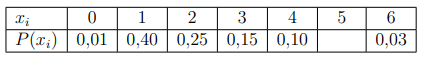
 
### 1. a)
 
The value of the probability function for 5 cars was difficult to read. Specify it:
 


In [ ]:
x = c(0,1,2,3,4,5,6)
p = c(0.01,0.40,0.25,0.15,0.10,0,0.03)
x
p

In [ ]:
1 - sum(p) # Computer arithmetic can be annoying here
round(1 - sum(p), digits=2) # round to the hundredth
p[6] = round(1 - sum(p), digits=2) # the notation for x=5 is the 6th position
p

In [ ]:
plot(x, p)

In [ ]:
# Probability function
probability_draw = function(x,p){
    plot(x, p, # solid wheels - in actual values
        ylab='p(x)',xaxt='n',pch=19,ylim=c(0,max(p)),main="Probability function") 
    lines(c(min(x)-100,max(x)+100),c(0, 0))
    for(i in 1:length(x)){
        lines(c(min(x)-100,max(x)+100), c(p[i],p[i]),
              type = 'l', lty = 3, lwd=0.5) # horizontal grid
        lines(c(x[i],x[i]), c(-0.1,1.1), 
              type = 'l', lty = 3, lwd=0.5) # vertical grid
    }
    par(new=TRUE) # that we want to draw in one graph
    plot(x, p*0, # empty circles - where a non-zero value is defined
        ylab='p(x)', xaxt='n', ylim=c(0,max(p)))
    axis(1, at=x,labels=x) # set values to X
    axis(4, at=p,labels=p, las=2, cex.axis=0.7, tck=-.01) # and Y
}

probability_draw(x, p)

More on plotting in R can be found here: http://www.statmethods.net/advgraphs/parameters.html or here https://flowingdata.com/2015/03/17/r-cheat-sheet-for-graphical-parameters/ or http://bcb.dfci.harvard.edu/~aedin/courses/BiocDec2011/2.Plotting.pdf
 


### 1. b)
 
Determine and plot the distribution function of the random variable X, which is defined as the number of rented cars.
 


In [ ]:
p
F = cumsum(p)
F

In [ ]:
plot(x, F, type="s") # simplified distribution function graph


In [ ]:
# Function for calculating and plotting the distribution function
distribution_draw = function(x,p){
    F = cumsum(p)
    F_ext = c(0, F) # we stretch F by 0 at the beginning
    x_ext = c(x[1]-1, x, x[length(x)]+1) # axz both sides
       
    plot(x, F, ylab="F(x)", xaxt='n', ylim=c(0,1), # empty wheels
         type='p', main="Distribution function") 
    par(new=TRUE) # that we want to draw in one graph
    plot(x, F_ext[1:(length(F_ext)-1)], # full wheels
         ylab="F(x)", xaxt='n', ylim=c(0,1), type='p', pch=19) 
    
    for(i in 1:(length(x_ext)-1)){
        lines(c(min(x)-100,max(x)+100), c(F_ext[i],F_ext[i]),
              type = 'l', lty = 3, lwd=0.5) # horizontal grid
        lines(c(x_ext[i],x_ext[i]), c(-0.1,1.1), 
              type = 'l', lty = 3, lwd=0.5) # vertical grid
        lines(x_ext[i:(i+1)], c(F_ext[i],F_ext[i])) # graph - lines
    }
    axis(1, at=x,labels=x) # set values to X
    axis(4, at=F,labels=F, las=2, cex.axis=0.7, tck=-.01) # a Y
    return(F)
}

distribution_draw(x,p)

### 1. c)
 
Determine the mean, variance, standard deviation, and mode of the number of cars rented per day.
 


In [ ]:
# Mean value
x*p
EX = sum(x*p)
EX

In [ ]:
# Scattering
EX2 = sum(x*x*p)  # second general moment
DX = EX2 - EX^2
DX

In [ ]:
# Standard deviation
sigma.X = sqrt(DX)
sigma.X

In [ ]:
# Functions for calculating basic numerical characteristics
summary_of_RV=function(x,p){
  EX = sum(x*p)
  EX2 = sum(x*x*p)  
  DX = EX2-EX^2
  sigma.X = sqrt(DX)
  # write the results to the table
  tab = rbind(EX, DX, sigma.X)
  tab.popis = c("mean","variance","st. dev.")
  rownames(tab) = tab.popis
  return(tab)
}

In [ ]:
summary_of_RV(x, p)

### 1. d)
 
Determine the probability function and the distribution function of the random variable Y, which is defined as the daily income of the service owner.
 


In [ ]:
y = 500*x
y

In [ ]:
probability_draw(y, p)

In [ ]:
# Distribution function
distribution_draw(y,p)

### 1. e)
 
Determine the mean, standard deviation, and mode of receipt of the service owner from rented cars within one day.
 


In [ ]:
summary_of_RV(y,p)

### 1. f)
 
Determine the probability that the service owner's income(random variable Y) from car rental will exceed his expenses.
 


In [ ]:
# profit
z=500*x-800
z

In [ ]:
# income exceeds expenses when profit is positive
z > 0

In [ ]:
p
sum(p[z>0])

### 1. g)
 
Determine the mean, standard deviation, and mode of the random variable Z, which is defined as the service owner's profit from rented cars in one day.
 


In [ ]:
summary_of_RV(z,p)

## Example # 2
 
For the distribution function of the random variable X: $F(x)=\begin{cases} 0   &      x \leq -1 \\ 0.3 & -1 < x \leq  0 \\ 0.7 &  0 < x \leq  1 \\ 1   & -1 < x \end{cases}$
 
### 2. a)
 
Determine the probability function of a random variable X, its mean and standard deviation.
 


In [ ]:
F = c(0, 0.3, 0.7, 1)
F
x = c(-1,0,1)
x

In [ ]:
diff(F)

In [ ]:
p = diff(F)
x
p

In [ ]:
probability_draw(x,p)

In [ ]:
distribution_draw(x,p)

In [ ]:
summary_of_RV(x,p)

### 2. b)
 
Random variable Y=1 - 3X, determine P(y), F(y), E(Y), D(Y).
 


In [ ]:
y = 1 - 3*x
probability_draw(y,p)

In [ ]:
distribution_draw(y,p)   # Nonsensical output - what is the cause?
y
p

In [ ]:
y
sort(y)
idx_sorted = order(y) # The order function returns the sorted order indexes
idx_sorted
y = y[idx_sorted]
p_y = p[idx_sorted]
p_y

In [ ]:
distribution_draw(y,p_y)

In [ ]:
summary_of_RV(y, p_y)

### 2. c)
 
Random variable W=$3X^2$, determine P(w), F(w), E(W), D(W).
 


In [ ]:
w = 3*x*x
w

In [ ]:
probability_draw(w,p)
distribution_draw(w,p)

In [ ]:
w
w_uniq = unique(w)
w_uniq
w_sorted = sort(w_uniq)
w_sorted

In [ ]:
p_w = w_sorted*0 # initialize an array of the same size
for(i in 1:length(w_sorted)){
    p_w[i] = sum(p[w == w_sorted[i]])
}
p_w

In [ ]:
probability_draw(w_sorted,p_w)
distribution_draw(w_sorted,p_w)
summary_of_RV(w_sorted,p_w)

## Example 3.
 
There are two machines working independently in the workshop. The probability of failure of the first machine is 0.2, the probability of failure of the second machine is 0.3. The random variable X is defined as the number of machines that have failed at the same time. Specify:
 
### 3. a)
 
probability function of a random variable X,
 


In [ ]:
x = c(0, 1, 2)
x
p1 = 0.2
p2 = 0.3

In [ ]:
p = x*0
# we calculate the individual probabilities of the number of broken machines
p[1] = (1 - p1)*(1 - p2) # 0 broken, so both in operation
p[3] = p1*p2 # 2 so broken both
p
1 - sum(p)
p[2] = (1 - p1)*p2 + p1*(1 - p2) # just one - either the first or the second
p

In [ ]:
sum(p)

In [ ]:
probability_draw(x,p)

### 3. b)
 
distribution function of random variable X,
 


In [ ]:
distribution_draw(x,p)

### 3. c)
 
mean and variance of a random variable X.
 


In [ ]:
summary_of_RV(x,p)